In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-price-prediction-dataset/House Price Prediction Dataset.csv


In [6]:
data=pd.read_csv("/kaggle/input/house-price-prediction-dataset/House Price Prediction Dataset.csv")
data
data.isnull().sum()
numeric_cols = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt']
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
categorical_cols = ['Location', 'Condition', 'Garage']

data_encoded = pd.get_dummies(data[categorical_cols], drop_first=True)

# Join the encoded columns back to original dataframe without categorical columns
data = data.drop(columns=categorical_cols).join(data_encoded)

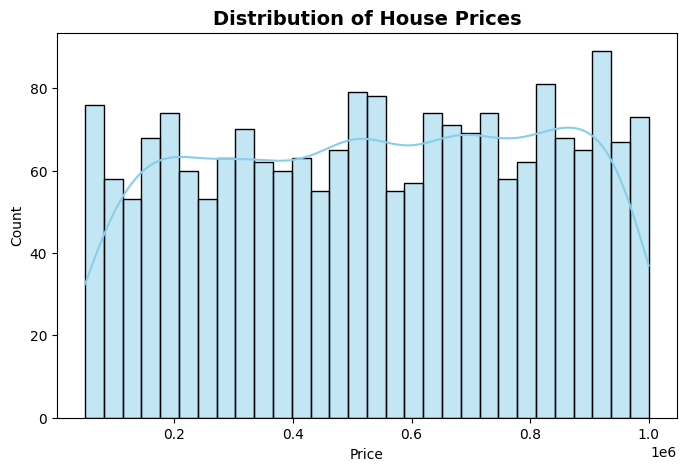

In [7]:
# 1. Price distribution
plt.figure(figsize=(8,5))
sns.histplot(data['Price'], kde=True, color='skyblue', bins=30)
plt.title("Distribution of House Prices", fontsize=14, weight='bold')
plt.show()

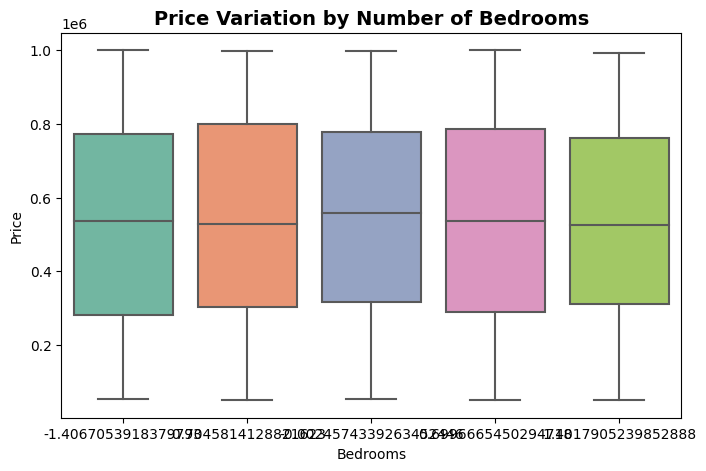

In [8]:
# 2. Bedrooms vs Price
plt.figure(figsize=(8,5))
sns.boxplot(x='Bedrooms', y='Price', data=data, palette='Set2')
plt.title("Price Variation by Number of Bedrooms", fontsize=14, weight='bold')
plt.show()

In [9]:
from sklearn.ensemble import RandomForestRegressor
# Select features and target
X = data[['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt']]
y = data['Price']

# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model=LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

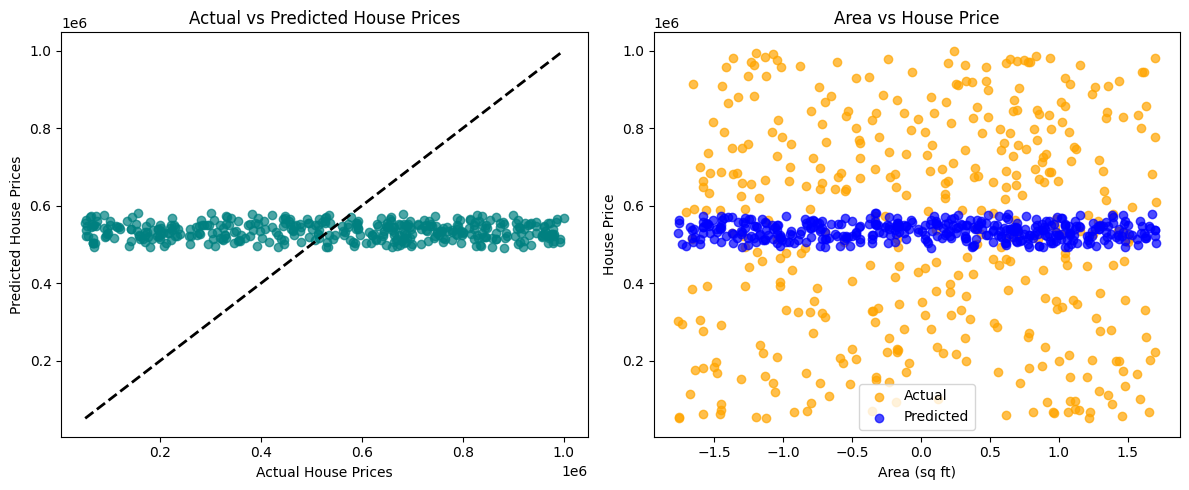

In [10]:
# Scatter plot: Actual vs Predicted Price
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')

# Scatter plot: Area vs Price (Actual & Predicted)
plt.subplot(1, 2, 2)
plt.scatter(X_test['Area'], y_test, label='Actual', alpha=0.7, color='orange')
plt.scatter(X_test['Area'], y_pred, label='Predicted', alpha=0.7, color='blue')
plt.xlabel('Area (sq ft)')
plt.ylabel('House Price')
plt.title('Area vs House Price')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared: {r2}')

Mean Squared Error (MSE): 78789724000.88458
Root Mean Squared Error (RMSE): 280695.0729900412
Mean Absolute Error (MAE): 244587.1999197856
R-squared: -0.01273663755401877


In [12]:
from datetime import datetime
def predict_house_price(area, bedrooms, bathrooms, floors, year_built):
    current_year = datetime.now().year
    house_age = current_year - year_built
    
    # Prepare input features in the same order your model expects
    input_features = pd.DataFrame({
        'Area': [area],
        'Bedrooms': [bedrooms],
        'Bathrooms': [bathrooms],
        'Floors': [floors],
        'YearBuilt': [year_built]
        
    })
    
    # Scale numeric features (make sure scaler was fitted on these columns)
    input_features_scaled = scaler.transform(input_features)
    
    # Predict price
    predicted_price = model.predict(input_features_scaled)
    return predicted_price[0]

# Example usage:
area = 2500
bedrooms = 3
bathrooms = 2
floors = 1
year_built = 2003

predicted_price = predict_house_price(area, bedrooms, bathrooms, floors, year_built)

print(f'Predicted House Price for {area} sq ft, {bedrooms} bedrooms, {bathrooms} bathrooms, {floors} floor(s), built in {year_built}: ${predicted_price:.2f}')

Predicted House Price for 2500 sq ft, 3 bedrooms, 2 bathrooms, 1 floor(s), built in 2003: $522827.72
